### SVM

by Piyush Sanghi

In [3]:
import pandas as pd
from sklearn import preprocessing, ensemble, metrics, svm, model_selection
import seaborn as sns

#### 1. Data Processing:

###### a) Import the data

In [4]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [3]:
train.shape, test.shape

((507, 148), (168, 148))

###### b) Remove any rows that have missing data across both sets of data.

In [8]:
train.dropna(inplace=True, axis=1)
test.dropna(inplace=True, axis=1)

In [9]:
train.shape, test.shape

((507, 148), (168, 148))

###### c) The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test". 

In [28]:
y_train = train[['class']]
y_test = test[['class']]

X_train = train.drop(['class'], axis=1)
X_test = test.drop(['class'], axis=1)

###### d) Scale all features / predictors (NOT THE TARGET VARIABLE)

In [34]:
def scaler(data):    
    columns = data.columns
    scalerObj = preprocessing.StandardScaler()
    data = scalerObj.fit_transform(data)
    data = pd.DataFrame(data, columns=columns)
    return data

In [37]:
X_train = scaler(X_train)
X_test = scaler(X_test)

#### 2. Random Forest Classifier - Base Model:

###### a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [42]:
model = ensemble.RandomForestClassifier(random_state=10)
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

###### b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [43]:
y_test_predicted = model.predict(X_test)

###### c) Calculate the confusion matrix and classification report for the train data. 

In [46]:
def calculate_classification_report_and_confusion_matrix(y_actual, y_predicted):
    #Printing the classification report
    print('-------------  Classification Report  -------------')
    print(metrics.classification_report(y_actual, y_predicted))
    
    print('-------------  Confusion Matrix  -------------')
    
    conf_matrix = metrics.confusion_matrix(y_actual, y_predicted)
    conf_matrix = pd.DataFrame(data=conf_matrix) #converting to dataframe
    
    #Plotting the confusion matrix
    sns.set(font_scale=1.5)
    sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 14}, cmap="YlGnBu", fmt='g') 

-------------  Classification Report  -------------
             precision    recall  f1-score   support

   asphalt        0.81      0.93      0.87        14
  building        0.75      0.84      0.79        25
       car        0.92      0.80      0.86        15
  concrete        0.64      0.78      0.71        23
     grass        0.92      0.79      0.85        29
      pool        1.00      0.80      0.89        15
    shadow        0.88      0.94      0.91        16
      soil        0.67      0.43      0.52        14
      tree        0.75      0.88      0.81        17

avg / total       0.81      0.80      0.80       168

-------------  Confusion Matrix  -------------


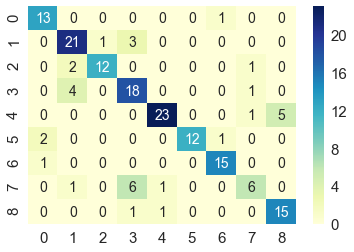

In [47]:
calculate_classification_report_and_confusion_matrix(y_test, y_test_predicted)

###### d) Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [49]:
y_train_predicted = model.predict(X_train)

-------------  Classification Report  -------------
             precision    recall  f1-score   support

   asphalt        1.00      1.00      1.00        45
  building        1.00      1.00      1.00        97
       car        1.00      1.00      1.00        21
  concrete        0.99      1.00      0.99        93
     grass        0.99      1.00      0.99        83
      pool        1.00      1.00      1.00        14
    shadow        0.98      1.00      0.99        45
      soil        1.00      0.95      0.97        20
      tree        1.00      0.98      0.99        89

avg / total       0.99      0.99      0.99       507

-------------  Confusion Matrix  -------------


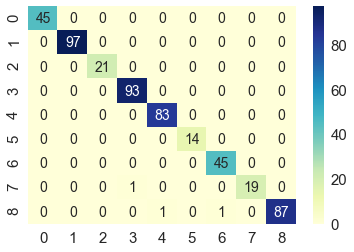

In [50]:
calculate_classification_report_and_confusion_matrix(y_train, y_train_predicted)

The model is over-fitting as there is significant difference in precision, recall and f1-score between train and test. In addition, the  precision, recall and f1-score for train is very high.

###### e) Identify the top 5 features. Feel free to print a list OR to make a plot. 

In [52]:
df = pd.DataFrame(data=list(zip(X_train.columns, model.feature_importances_)), columns=['Feature_Name', 'Importance'])

df.sort_values(['Importance'], ascending=False, inplace=True)
df.head(5)

,Feature_Name,Importance
18,NDVI,0.053017
27,Mean_G_40,0.036706
92,Mean_NIR_100,0.036277
60,NDVI_60,0.034340
8,Mean_NIR,0.029486


#### 3. LinearSVM Classifier - Base Model:

Create a simple LinearSVC Classifier only using default parameters.

###### a) Use the LinearSVC in sklearn. Fit your model on the training data.

In [57]:
model = svm.LinearSVC()
model.fit(X_train, y_train.values.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

###### b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [58]:
y_test_predicted = model.predict(X_test)

###### c) Calculate the confusion matrix and classification report for test data.

-------------  Classification Report  -------------
             precision    recall  f1-score   support

   asphalt        0.76      0.93      0.84        14
  building        0.68      0.84      0.75        25
       car        0.92      0.80      0.86        15
  concrete        0.67      0.70      0.68        23
     grass        0.75      0.72      0.74        29
      pool        1.00      0.80      0.89        15
    shadow        0.87      0.81      0.84        16
      soil        0.80      0.29      0.42        14
      tree        0.61      0.82      0.70        17

avg / total       0.77      0.75      0.74       168

-------------  Confusion Matrix  -------------


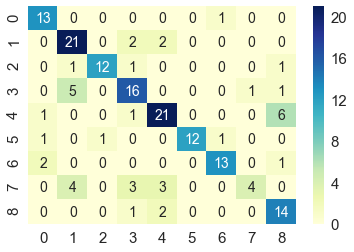

In [59]:
calculate_classification_report_and_confusion_matrix(y_test, y_test_predicted)

###### d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [60]:
y_train_predicted = model.predict(X_train)

-------------  Classification Report  -------------
             precision    recall  f1-score   support

   asphalt        1.00      0.98      0.99        45
  building        0.99      1.00      0.99        97
       car        1.00      1.00      1.00        21
  concrete        1.00      1.00      1.00        93
     grass        1.00      0.96      0.98        83
      pool        1.00      1.00      1.00        14
    shadow        0.98      1.00      0.99        45
      soil        1.00      1.00      1.00        20
      tree        0.98      1.00      0.99        89

avg / total       0.99      0.99      0.99       507

-------------  Confusion Matrix  -------------


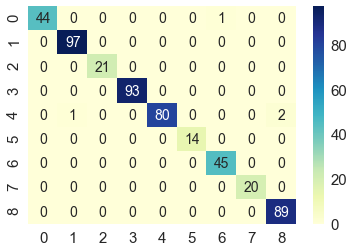

In [61]:
calculate_classification_report_and_confusion_matrix(y_train, y_train_predicted)

The model is over-fitting as there is significant difference in precision, recall and f1-score between train and test. In addition, the precision, recall and f1-score for train is very high.

#### 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with linear kernel.

###### a) Use SVC from sklearn with kernel = "linear". Run the GridSearchCV using the following (SVMs run much faster than RandomForest):

C: 0.01 - 10 in increments of 0.2 (consider using the np.arange() method from numpy to build out a sequence of values)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing (sorry to our grader for not specifying this last week!).

In [71]:
params = {
    'C': list(map(lambda x: x/1000, range(10, 10000, 200))),
    'kernel': ['linear'],
    'random_state': [10]
}

model = svm.SVC()

model_grid_search = model_selection.GridSearchCV(model, param_grid=params, cv=5, verbose=0)
model_grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41, 6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61, 8.81, 9.01, 9.21, 9.41, 9.61, 9.81], 'kernel': ['linear'], 'random_state': [10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

###### b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [74]:
best_model = model_grid_search.best_estimator_
print(best_model)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)


###### c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [75]:
y_test_predicted = best_model.predict(X_test)

###### d) Calculate the confusion matrix and classification report for test data.

-------------  Classification Report  -------------
             precision    recall  f1-score   support

   asphalt        0.81      0.93      0.87        14
  building        0.79      0.88      0.83        25
       car        1.00      0.93      0.97        15
  concrete        0.66      0.83      0.73        23
     grass        0.86      0.86      0.86        29
      pool        1.00      0.87      0.93        15
    shadow        0.87      0.81      0.84        16
      soil        0.80      0.29      0.42        14
      tree        0.84      0.94      0.89        17

avg / total       0.84      0.83      0.82       168

-------------  Confusion Matrix  -------------


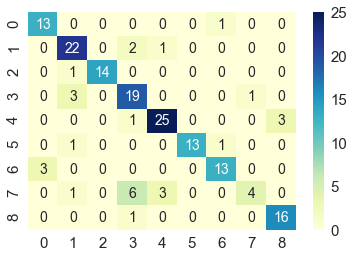

In [76]:
calculate_classification_report_and_confusion_matrix(y_test, y_test_predicted)

###### e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [77]:
y_train_predicted = best_model.predict(X_train)

-------------  Classification Report  -------------
             precision    recall  f1-score   support

   asphalt        0.93      0.89      0.91        45
  building        0.85      0.90      0.87        97
       car        1.00      0.90      0.95        21
  concrete        0.87      0.89      0.88        93
     grass        0.91      0.84      0.88        83
      pool        1.00      0.86      0.92        14
    shadow        0.86      0.96      0.91        45
      soil        1.00      0.55      0.71        20
      tree        0.87      0.96      0.91        89

avg / total       0.89      0.89      0.89       507

-------------  Confusion Matrix  -------------


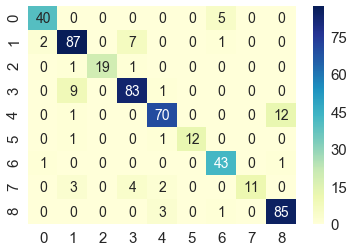

In [78]:
calculate_classification_report_and_confusion_matrix(y_train, y_train_predicted)

This model fits well. It overfits a little as precision, recall and f1-score drops by ~10% from train to test

#### 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a polynomial kernel.

###### a) Use SVC from sklearn with kernel = "poly". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2
degree: 2, 3, 4, 5, 6

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

In [79]:
params = {
    'C': list(map(lambda x: x/1000, range(10, 10000, 200))),
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5, 6]
}

model = svm.SVC()

model_grid_search = model_selection.GridSearchCV(model, param_grid=params, cv=5, verbose=0)
model_grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41, 6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61, 8.81, 9.01, 9.21, 9.41, 9.61, 9.81], 'kernel': ['poly'], 'degree': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

###### b) Identify the best performing model:

In [80]:
best_model_model = model_grid_search.best_estimator_
print(best_model)

SVC(C=8.41, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


###### c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [81]:
y_test_predicted = best_model.predict(X_test)

###### d) Calculate the confusion matrix and classification report for test data.

-------------  Classification Report  -------------
             precision    recall  f1-score   support

   asphalt        0.93      0.93      0.93        14
  building        0.67      0.72      0.69        25
       car        1.00      0.73      0.85        15
  concrete        0.62      0.87      0.73        23
     grass        0.64      0.79      0.71        29
      pool        1.00      0.67      0.80        15
    shadow        0.82      0.88      0.85        16
      soil        0.33      0.07      0.12        14
      tree        0.72      0.76      0.74        17

avg / total       0.73      0.73      0.71       168

-------------  Confusion Matrix  -------------


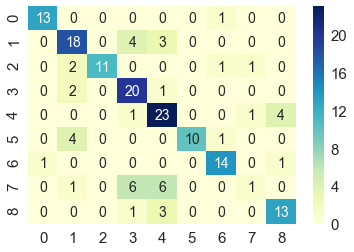

In [82]:
calculate_classification_report_and_confusion_matrix(y_test, y_test_predicted)

###### e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [83]:
y_train_predicted = best_model.predict(X_train)

-------------  Classification Report  -------------
             precision    recall  f1-score   support

   asphalt        1.00      1.00      1.00        45
  building        0.98      1.00      0.99        97
       car        1.00      0.95      0.98        21
  concrete        1.00      0.98      0.99        93
     grass        0.90      0.99      0.94        83
      pool        1.00      0.93      0.96        14
    shadow        1.00      1.00      1.00        45
      soil        1.00      0.75      0.86        20
      tree        1.00      0.99      0.99        89

avg / total       0.98      0.98      0.98       507

-------------  Confusion Matrix  -------------


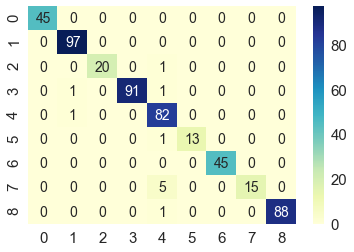

In [84]:
calculate_classification_report_and_confusion_matrix(y_train, y_train_predicted)

This model does show signs of over-fitting. Precision, recall and f1-score between train and test have a significant difference. In addition, the precision, recall and f1-score for train is extremely high.

#### 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a RBF kernel.

###### a) Use SVC from sklearn with kernel = "rbf". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2
gamma: 0.01,  0.1, 1, 10, 100

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.

In [88]:
params = {
    'C': list(map(lambda x: x/1000, range(10, 10000, 200))),
    'kernel': ['rbf'],
    'gamma': [0.01, 0., 1, 10, 100]
}

model = svm.SVC()

model_grid_search = model_selection.GridSearchCV(model, param_grid=params, cv=5, verbose=0)
model_grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41, 6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61, 8.81, 9.01, 9.21, 9.41, 9.61, 9.81], 'kernel': ['rbf'], 'gamma': [0.01, 0.0, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

###### b) Identify the best performing model:

In [89]:
best_model = model_grid_searcharch.best_estimator_
print(best_model)

SVC(C=4.21, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


###### c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [90]:
y_test_predicted = best_model.predict(X_test)

###### d) Calculate the confusion matrix and classification report for test data.

-------------  Classification Report  -------------
             precision    recall  f1-score   support

   asphalt        0.93      0.93      0.93        14
  building        0.83      0.76      0.79        25
       car        1.00      0.93      0.97        15
  concrete        0.60      0.91      0.72        23
     grass        0.85      0.79      0.82        29
      pool        1.00      0.93      0.97        15
    shadow        0.88      0.88      0.88        16
      soil        1.00      0.36      0.53        14
      tree        0.80      0.94      0.86        17

avg / total       0.86      0.83      0.82       168

-------------  Confusion Matrix  -------------


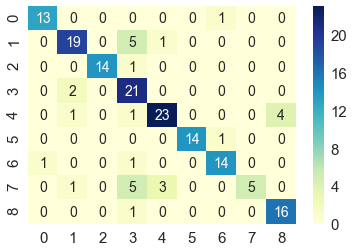

In [91]:
calculate_classification_report_and_confusion_matrix(y_test, y_test_predicted)

###### e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [92]:
y_train_predicted = best_model.predict(X_train)

-------------  Classification Report  -------------
             precision    recall  f1-score   support

   asphalt        1.00      1.00      1.00        45
  building        0.98      1.00      0.99        97
       car        1.00      1.00      1.00        21
  concrete        1.00      0.99      0.99        93
     grass        0.99      0.99      0.99        83
      pool        1.00      1.00      1.00        14
    shadow        1.00      1.00      1.00        45
      soil        1.00      1.00      1.00        20
      tree        1.00      0.99      0.99        89

avg / total       0.99      0.99      0.99       507

-------------  Confusion Matrix  -------------


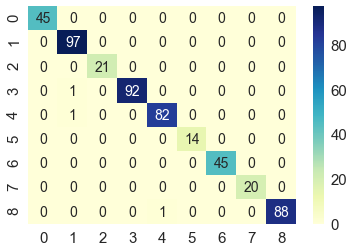

In [93]:
calculate_classification_report_and_confusion_matrix(y_train, y_train_predicted)

This model does show signs of over-fitting. Precision, recall and f1-score between train and test have a significant difference. In addition, the precision, recall and f1-score for train is extremely high.